<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dt

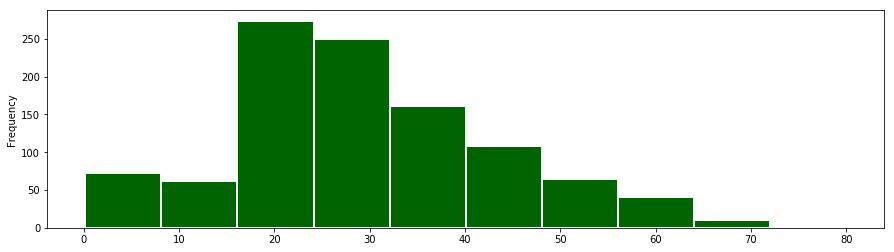

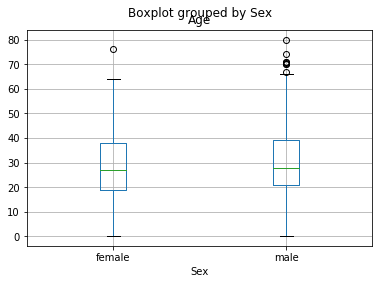

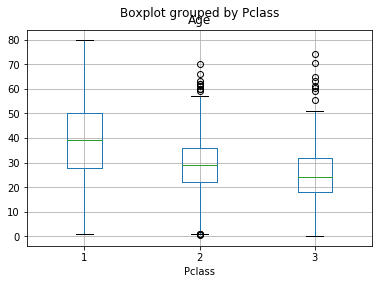

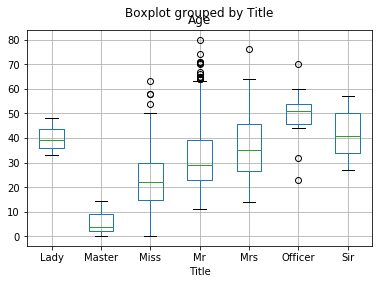

In [257]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

proj_path = os.path.join((os.getcwd()),os.path.pardir)
raw_path = os.path.join(proj_path, "data","raw")
train_file_path=os.path.join(raw_path, "train.csv")
test_file_path=os.path.join(raw_path, "test.csv")
train_df = pd.read_csv(train_file_path, index_col="PassengerId")
test_df = pd.read_csv(test_file_path, index_col="PassengerId")
test_df['Survived']=-999
titanic_df = pd.concat((train_df,test_df))

titanic_df.info()

titanic_df[titanic_df["Embarked"].isnull()]

titanic_df["Embarked"].value_counts()

titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Survived"]).Survived.count()

titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Survived"]).agg({"Survived":"count"})
#tdf_sur = titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Survived"]).agg({"Survived":"count"});
#tdf_sur.groupby(level=0).apply(lambda x : x/x.sum())

#tdf_sur = titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Pclass"]).agg({"Fare":"median"});
#tdf_sur.groupby(level=0).apply(lambda x : x/x.sum())
titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Pclass"]).agg({"Fare":"median"})

tdf_sur = titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Sex"]).agg({"Survived":"count"});
tdf_sur.groupby(level=0).apply(lambda x : x/x.sum())

pd.crosstab(titanic_df.Embarked, titanic_df.Survived)

titanic_df.Embarked.fillna('C',inplace=True)

titanic_df.info()

titanic_df.loc[titanic_df.Fare.isnull()]

titanic_df[((titanic_df.Embarked=="S") & (titanic_df.Pclass==3))].Fare.median()

titanic_df.Fare.fillna(titanic_df[((titanic_df.Embarked=="S") & (titanic_df.Pclass==3))].Fare.median(),inplace=True)

titanic_df.info()

pd.options.display.max_rows=10
titanic_df[titanic_df.Age.isnull()]

%matplotlib inline
titanic_df.Age.plot(kind="hist",figsize=(15,4), edgecolor='white', linewidth=2, color="darkgreen");

print("Mean Age:",titanic_df.Age.mean(),"Median Age:",titanic_df.Age.median())

titanic_df.groupby("Sex").Age.mean()

titanic_df.groupby("Sex").Age.median()

titanic_df[titanic_df["Age"].notnull()].boxplot('Age',"Sex");

titanic_df[titanic_df["Age"].notnull()].boxplot('Age',"Pclass");

titanic_df.Name

getTitle = lambda name: name.split(",")[1].split('.')[0].strip().lower()
getTitle("Minahan, Mrs. William Edward (Lillian E Thorpe)")
titanic_df.Name.map(lambda nm: getTitle(nm));

#titanic_df.Name.map(getTitle)
# titanic_df.Name.map(lambda nm: getTitle(nm));
# x.unique()

titanic_df.Name.map(lambda nm: getTitle(nm)).unique()

title_group = {'mr':'Mr',
'mrs':'Mrs',
'miss':'Miss',
'master':'Master',
'don':'Sir',
'rev':'Sir',
'dr':'Officer',
'mme':'Mrs',
'ms':'Mrs',
'major':'Officer',
'lady':'Lady',
'sir':'Sir',
'mlle':"Miss",
'col':'Officer',
'capt':'Officer',
'the countess':'Lady',
'jonkheer':"Sir",
'dona':"Lady"
}


getTitle = lambda name: title_group[name.split(",")[1].split('.')[0].strip().lower()]

titanic_df.Name.map(lambda nm: getTitle(nm)).unique()

titanic_df['Title'] = titanic_df.Name.map(lambda nm: getTitle(nm))

titanic_df.head()

titanic_df[titanic_df.Age.notnull()].boxplot('Age',"Title");

title_age_median=titanic_df.groupby("Title").Age.transform('median')

title_age_median.head()

titanic_df.Age.fillna(title_age_median,inplace=True)

titanic_df.info()

titanic_df[titanic_df.Survived.isnull()]



titanic_df.info()

In [258]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


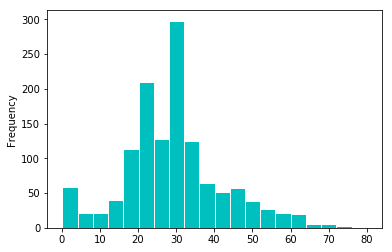

In [259]:
titanic_df.Age.plot(kind="hist",bins=20,color="c",edgecolor="w" , linewidth=1)

In [260]:
titanic_df[titanic_df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-999,19877,Mrs


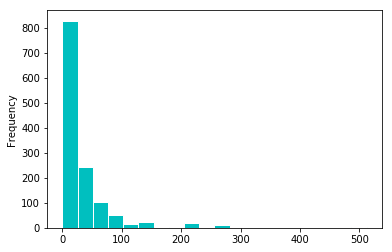

In [261]:
titanic_df.Fare.plot(kind="hist",bins=20,color="c",edgecolor="w" , linewidth=1);


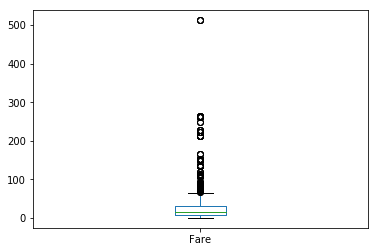

In [262]:
titanic_df.Fare.plot(kind="box");

In [263]:
titanic_df.loc[titanic_df.Fare==titanic_df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-999,PC 17755,Mrs


In [264]:
LogFare = np.log(titanic_df.Fare+1)

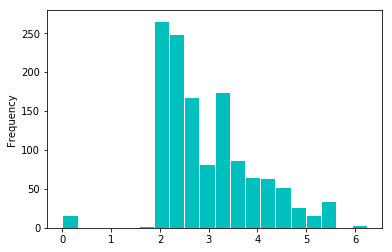

In [265]:
LogFare.plot(kind="hist",bins=20,color="c",edgecolor="w" , linewidth=1);

In [266]:
qcut_data=pd.qcut(titanic_df.Fare,4, labels=["very_low","low","medium","high"]).value_counts();

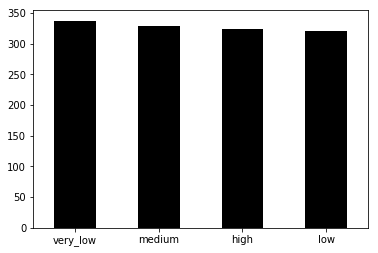

In [267]:
qcut_data.plot(kind="bar",color="black",rot=0);

In [268]:
titanic_df["Fare_Bin"]=pd.qcut(titanic_df.Fare,4, labels=["very_low","low","medium","high"])

In [269]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


In [270]:
titanic_df['Agestate']=np.where(titanic_df["Age"]>=18,"Adults","Child")

In [271]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
Agestate    1309 non-null object
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 144.6+ KB


In [272]:
titanic_df[titanic_df.Survived != -999].groupby("Agestate").Survived.value_counts().unstack()

Survived,0,1
Agestate,,
Adults,495,279
Child,54,63


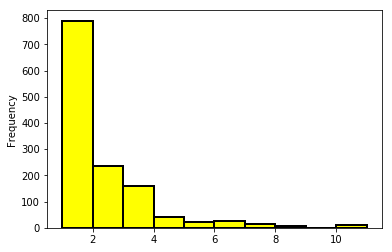

In [273]:
titanic_df['FamilySize']=titanic_df.Parch + titanic_df.SibSp + 1
titanic_df.FamilySize.plot(kind="hist", color="yellow",edgecolor='black', linewidth=2);

In [274]:
titanic_df.loc[titanic_df.FamilySize==titanic_df.FamilySize.max(),["Name","Survived","FamilySize","Ticket"]]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
...,...,...,...,...
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-999,11,CA. 2343
1234,"Sage, Mr. John George",-999,11,CA. 2343


In [275]:
pd.crosstab(titanic_df[titanic_df.Survived!=-999].Survived,titanic_df[titanic_df.Survived!=-999].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [276]:
titanic_df['IsMother']=np.where(((titanic_df.Sex=='female') & (titanic_df.Age > 18) & (titanic_df.Parch > 0) & (titanic_df.Title != "Miss")),1,0)

In [277]:
pd.crosstab(titanic_df[titanic_df.Survived!=-999].Survived,titanic_df[titanic_df.Survived!=-999].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [278]:
titanic_df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [279]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [280]:
titanic_df.loc[titanic_df.Cabin=="T"]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,Agestate,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,high,Adults,1,0


In [282]:
titanic_df.loc[titanic_df.Cabin=="T","Cabin"]==np.NaN

PassengerId
340    False
Name: Cabin, dtype: bool

In [283]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [285]:
get_deck = lambda cabin: np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z');

titanic_df['Deck']=titanic_df['Cabin'].map(lambda cabin: get_deck(cabin))
titanic_df.Deck.value_counts()
    

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [286]:
pd.crosstab(titanic_df[titanic_df.Survived!=-999].Survived,titanic_df[titanic_df.Survived!=-999].Deck)

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [287]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
Agestate      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


In [293]:
titanic_df["IsMale"]=np.where(titanic_df.Sex=="male",1,0);
df = pd.get_dummies(titanic_df,columns=["Deck","Pclass","Title","Fare_Bin","Embarked","Agestate"]);
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 40 columns):
Age                  1309 non-null float64
Cabin                295 non-null object
Fare                 1309 non-null float64
Name                 1309 non-null object
Parch                1309 non-null int64
Sex                  1309 non-null object
SibSp                1309 non-null int64
Survived             1309 non-null int64
Ticket               1309 non-null object
FamilySize           1309 non-null int64
IsMother             1309 non-null int32
IsMale               1309 non-null int32
Deck_A               1309 non-null uint8
Deck_B               1309 non-null uint8
Deck_C               1309 non-null uint8
Deck_D               1309 non-null uint8
Deck_E               1309 non-null uint8
Deck_F               1309 non-null uint8
Deck_G               1309 non-null uint8
Deck_T               1309 non-null uint8
Deck_Z               1309 non-null uint8
Pclass_1             1309

In [299]:
try:
    df.drop(["Cabin","Name","Ticket","Parch","SibSp","Sex"],axis=1,inplace=True);
except:
    pass
cols = ['Survived'] + [col for col in df.columns if col != 'Survived']

In [300]:
df=df[cols]

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 34 columns):
Survived             1309 non-null int64
Age                  1309 non-null float64
Fare                 1309 non-null float64
FamilySize           1309 non-null int64
IsMother             1309 non-null int32
IsMale               1309 non-null int32
Deck_A               1309 non-null uint8
Deck_B               1309 non-null uint8
Deck_C               1309 non-null uint8
Deck_D               1309 non-null uint8
Deck_E               1309 non-null uint8
Deck_F               1309 non-null uint8
Deck_G               1309 non-null uint8
Deck_T               1309 non-null uint8
Deck_Z               1309 non-null uint8
Pclass_1             1309 non-null uint8
Pclass_2             1309 non-null uint8
Pclass_3             1309 non-null uint8
Title_Lady           1309 non-null uint8
Title_Master         1309 non-null uint8
Title_Miss           1309 non-null uint8
Title_Mr             1309 no

In [303]:
import pathlib2 as pl2
pl2.Path(os.path.join(os.path.pardir,"data","processed")).mkdir(parents=True, exist_ok=True)
pr_train_path=os.path.join(os.path.pardir,"data","processed","train.csv")
pr_test_path=os.path.join(os.path.pardir,"data","processed","test.csv")

In [304]:
df.loc[df.Survived!=-999].to_csv(pr_train_path)
colms = [c for c in df.columns if c!='Survived']
df.loc[df.Survived==-999,colms].to_csv(pr_test_path)

In [305]:
!ls -lrt ../data/processed

total 108
-rw-r--r-- 1 debab 197609 71574 Jan  1 09:05 train.csv
-rw-r--r-- 1 debab 197609 33318 Jan  1 09:05 test.csv
